Notes from [Python Data Science Essentials book](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781786462138/5/ch05lvl1sec42/graph-algorithms)

### Graph Theory

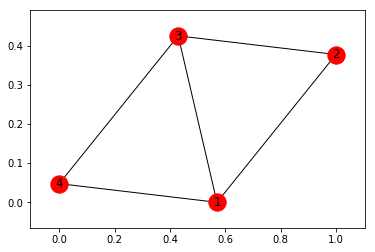

In [19]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_nodes_from([3, 4])
G.add_edge(3, 4)
G.add_edges_from([(2, 3), (4, 1)])
G.add_edge(1,3)
nx.draw_networkx(G)
plt.show()

In [20]:
print(G.nodes())
print(G.edges())
print(G.adjacency_list())

[1, 2, 3, 4]
[(1, 2), (1, 4), (1, 3), (2, 3), (3, 4)]
[[2, 4, 3], [1, 3], [4, 2, 1], [3, 1]]


Represent the graph as a dictionary of lists with the structure `{nodename: adjacency_list}`: 

In [21]:
nx.to_dict_of_lists(G)

{1: [2, 4, 3], 2: [1, 3], 3: [4, 2, 1], 4: [3, 1]}

Represent the graph as a numpy matrix, a sparse matrix or a dataframe : 

In [22]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  1.,  1.,  1.],
        [ 1.,  0.,  1.,  0.],
        [ 1.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.]])

In [23]:
print(nx.to_scipy_sparse_matrix(G))

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1


In [24]:
nx.to_pandas_dataframe(G)

,1,2,3,4
1,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0


In [27]:
G.degree()

{1: 3, 2: 2, 3: 3, 4: 2}

Generate a network with 1000 nodes and a 5% link probability then plot the histogram of the node degrees:

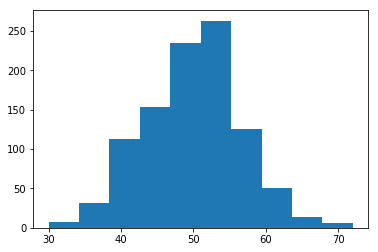

In [43]:
k = nx.fast_gnp_random_graph(1000, 0.05).degree()
plt.hist(list(k.values()));

### Graph Algorithms

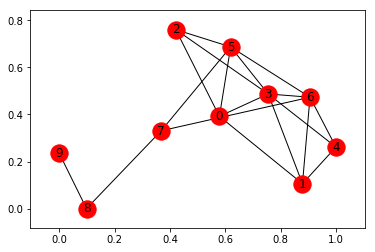

In [47]:
G = nx.krackhardt_kite_graph()
nx.draw_networkx(G)

In [48]:
print(nx.has_path(G, source=1, target=9))
print(nx.shortest_path(G, source=1, target=9))
print(nx.shortest_path_length(G, source=1, target=9))

True
[1, 6, 7, 8, 9]
4


In [49]:
nx.eigenvector_centrality(G)

{0: 0.35220918419838565,
 1: 0.35220918419838565,
 2: 0.28583482369644964,
 3: 0.481020669200118,
 4: 0.28583482369644964,
 5: 0.3976909028137205,
 6: 0.3976909028137205,
 7: 0.19586101425312444,
 8: 0.04807425308073236,
 9: 0.011163556091491361}

In [50]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0.0,
 9: 0.0}

In [51]:
d = nx.coloring.greedy_color(G)

In [52]:
print(d)

{3: 0, 5: 1, 6: 2, 0: 2, 1: 1, 2: 3, 4: 3, 7: 0, 8: 1, 9: 0}


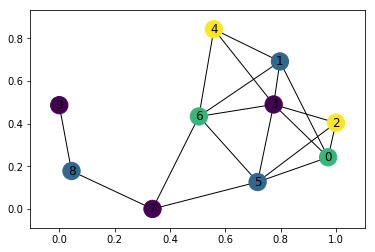

In [53]:
nx.draw_networkx(G, node_color=[d[n] for n in sorted(d.keys())])
plt.show()